<a href="https://colab.research.google.com/github/Ayush7614/Soomvaar/blob/main/Tensorflow%20Pratice/Tensorflow_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [27]:
training_data = np.load('TF_intro.npz')

In [28]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 24.5115
Epoch 2/100
32/32 - 0s - loss: 1.1483
Epoch 3/100
32/32 - 0s - loss: 0.4479
Epoch 4/100
32/32 - 0s - loss: 0.3873
Epoch 5/100
32/32 - 0s - loss: 0.3930
Epoch 6/100
32/32 - 0s - loss: 0.3524
Epoch 7/100
32/32 - 0s - loss: 0.3709
Epoch 8/100
32/32 - 0s - loss: 0.3729
Epoch 9/100
32/32 - 0s - loss: 0.3899
Epoch 10/100
32/32 - 0s - loss: 0.3897
Epoch 11/100
32/32 - 0s - loss: 0.3663
Epoch 12/100
32/32 - 0s - loss: 0.3669
Epoch 13/100
32/32 - 0s - loss: 0.3794
Epoch 14/100
32/32 - 0s - loss: 0.4080
Epoch 15/100
32/32 - 0s - loss: 0.3714
Epoch 16/100
32/32 - 0s - loss: 0.3968
Epoch 17/100
32/32 - 0s - loss: 0.3866
Epoch 18/100
32/32 - 0s - loss: 0.3657
Epoch 19/100
32/32 - 0s - loss: 0.3833
Epoch 20/100
32/32 - 0s - loss: 0.3887
Epoch 21/100
32/32 - 0s - loss: 0.3687
Epoch 22/100
32/32 - 0s - loss: 0.3767
Epoch 23/100
32/32 - 0s - loss: 0.3927
Epoch 24/100
32/32 - 0s - loss: 0.3800
Epoch 25/100
32/32 - 0s - loss: 0.3921
Epoch 26/100
32/32 - 0s - loss: 0

In [29]:
model.layers[0].get_weights()

[array([[ 2.0220542],
        [-3.0275977]], dtype=float32), array([4.9697137], dtype=float32)]

In [30]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0220542],
       [-3.0275977]], dtype=float32)

In [31]:
bias = model.layers[0].get_weights()[1]
bias


array([4.9697137], dtype=float32)

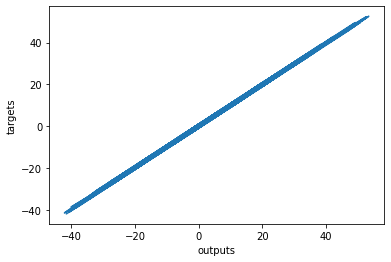

In [32]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()